<a href="https://colab.research.google.com/github/Frederick-Stein/test/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

In [ ]:
# torch.random.set_rng_state
# torch.manual_seed(42)
sample_size = 100
in_features = 6
out_features = 1
x = torch.randn(sample_size, in_features,
                dtype = None,
                requires_grad = False)
w = torch.randn(size = (in_features, out_features),
                dtype = None,
                requires_grad = False)
b = torch.randn(out_features) * torch.ones(sample_size, out_features)
y = torch.mm(x, w) + b

train_split = int(0.8 * len(x))
x_train, x_test = x[: train_split, :], x[train_split:, :]
y_train, y_test = y[: train_split, :], y[train_split:, :]
print(f'Weight w: {w}')
print(f'Bias b: {b[0]}')
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {y_train.shape}')
print(b.shape)

Weight w: tensor([[-1.3680],
        [ 0.4654],
        [ 1.5659],
        [-0.2225],
        [ 1.2763],
        [-1.2498]])
Bias b: tensor([1.9214])
Training data shape: torch.Size([80, 6])
Testing data shape: torch.Size([80, 1])
torch.Size([100, 1])


In [ ]:
class LinearRegressionModel(nn.Module):

  def __init__(self, in_features: int, out_features: int, bias = True):

        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.weight = nn.Parameter(torch.randn(size = (self.out_features, self.in_features),
                                        dtype = torch.float32,
                                        requires_grad = True,
                                        device = None)
                            )
        if bias:
            self.bias = nn.Parameter(torch.randn(out_features,
                                            dtype = torch.float32,
                                            requires_grad = True,
                                            device = None)
                            )
        else:
            self.bias = None

  def forward(self, x: torch.Tensor):

    y = torch.mm(x, self.weight.T)
    if self.bias:
      y += self.bias
    return y

In [ ]:
model_0 = LinearRegressionModel(in_features, out_features)
optimizer = optim.SGD(model_0.parameters(), lr = 0.1, weight_decay = 0.01)
lossfcn = nn.MSELoss()
epochs = 101
test_error = []
train_error = []
epoch_count = []

for epoch in range(epochs):

    model_0.train()

    y_predict = model_0(x_train)

    loss = lossfcn(y_predict, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(x_test)

        test_loss = lossfcn(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            test_error.append(test_loss.item())
            train_error.append(loss.item())
            print(f"Epoch: {epoch} | MSE for training set: {loss.item(): 4f} | MSE for testing set: {test_loss.item(): 4f}")

Epoch: 0 | MSE for training set:  15.369751 | MSE for testing set:  12.883059
Epoch: 10 | MSE for training set:  0.412264 | MSE for testing set:  0.518826
Epoch: 20 | MSE for training set:  0.027337 | MSE for testing set:  0.035212
Epoch: 30 | MSE for training set:  0.002952 | MSE for testing set:  0.004266
Epoch: 40 | MSE for training set:  0.000776 | MSE for testing set:  0.001341
Epoch: 50 | MSE for training set:  0.000476 | MSE for testing set:  0.000898
Epoch: 60 | MSE for training set:  0.000416 | MSE for testing set:  0.000805
Epoch: 70 | MSE for training set:  0.000402 | MSE for testing set:  0.000783
Epoch: 80 | MSE for training set:  0.000398 | MSE for testing set:  0.000777
Epoch: 90 | MSE for training set:  0.000398 | MSE for testing set:  0.000776
Epoch: 100 | MSE for training set:  0.000397 | MSE for testing set:  0.000775


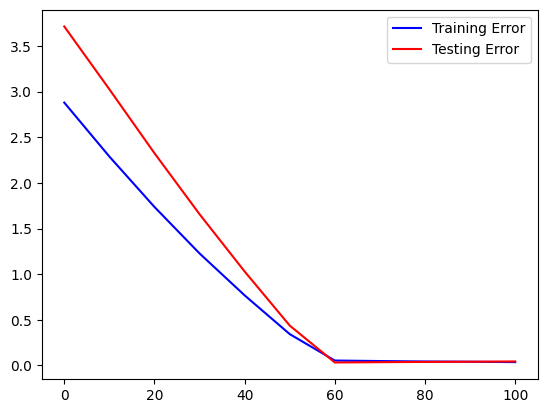

In [ ]:
plt.plot(epoch_count, train_error, c = 'b', label = 'Training Error')
plt.plot(epoch_count, test_error, c = 'r', label = 'Testing Error')
plt.legend()

In [ ]:
print(model_0.state_dict())

OrderedDict([('weight', tensor([[-1.3576,  0.4618,  1.5570, -0.2226,  1.2668, -1.2391]])), ('bias', tensor([1.9085]))])
